# Data Mining (2CSDE71)
## Name :- Harsh Pansuriya
## Roll No. :- 21BCE176
## Date :- 19th January, 2024
## Prac. No :- 2

> Aim :- Calculate the dissimilarity value of the various types of attributes on the dataset identified in Practical 1.

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform, jaccard, cityblock

In [2]:
# Assuming the data is in a CSV file (adjust if needed)
data = pd.read_csv("/Users/harsh/Documents/DM/Database/hr_ds.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

> In this dataset we can see that 2 attribute have some null values. One is DateofTermination and another is ManagerID.
So we will remove those attributes. 

In [4]:
# Drop the specified columns
columns_to_remove = ["DateofTermination", "ManagerID"]
data = data.drop(columns=columns_to_remove)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

> from the above dataset we will select the attributes which can be used for mining the info from dataset. 

In [6]:
# Select the specified columns
selected_columns = ["MarriedID", "Salary", "Position", "Sex", "EngagementSurvey", "Absences"]
selected_data = data[selected_columns]

# Rename the 'EngagementSurvey' column to 'EngagementScore'
selected_data = selected_data.rename(columns={'EngagementSurvey': 'EngagementScore'})
selected_data['Position'] = selected_data['Position'].str.strip()

In [7]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MarriedID        311 non-null    int64  
 1   Salary           311 non-null    int64  
 2   Position         311 non-null    object 
 3   Sex              311 non-null    object 
 4   EngagementScore  311 non-null    float64
 5   Absences         311 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 14.7+ KB


In [8]:
position_hierarchy = {
    1: ['President & CEO', 'CIO'],
    2: ['Director of Operations', 'Sales Manager', 'Shared Services Manager', 'IT Manager - Infra', 'IT Manager - DB'],
    3: ['Sr. DBA', 'Software Engineer', 'Data Analyst', 'Database Administrator', 'Enterprise Architect',
                  'Sr. Accountant', 'Production Manager', 'Accountant I', 'Area Sales Manager',
                  'Software Engineering Manager', 'BI Director', 'Sr. Network Engineer', 'Sales Manager',
                  'BI Developer', 'IT Manager - Support', 'Network Engineer', 'IT Director', 'Director of Sales',
                  'Principal Data Architect', 'Data Architect', 'IT Manager - DB', 'Data Analyst', 'Senior BI Developer',
                  'Production Technician I','Production Technician II'],
    4: ['IT Support', 'Administrative Assistant']
}

In [9]:
# Create a new column with hierarchical encoding
def encode_position(position):
    for level, positions in position_hierarchy.items():
        if position in positions:
            return level
    return 'Unknown'  # Assign a default level for positions not in the hierarchy
selected_data['PositionHierarchy'] = selected_data['Position'].apply(encode_position)
selected_data['PositionHierarchy'] = selected_data['PositionHierarchy'].astype(int)

In [10]:
# Map 'Male' to 0 and 'Female' to 1 in the 'Sex' column
# Clean up whitespaces in the 'Sex' column and map to integers
sex_mapping = {'M': 0, 'F': 1}
selected_data['Sex'] = selected_data['Sex'].str.strip().map(sex_mapping)

In [11]:
from tabulate import tabulate

# Define the table data
table_data = [
    ["Column Name", "Data type", "Attribute type"],
    ["MarriedID", "boolean", "Nominal data"],
    ["Salary", "int64", "Numerical data"],
    ["Position", "int8", "Ordinal data"],
    ["Sex", "boolean", "Nominal data"],
    ["EngagementScore", "float64", "Numerical data"],
    ["Absences", "int64", "Numerical data"],
]

# Print the table using tabulate
print(tabulate(table_data, headers="firstrow", tablefmt="fancy_grid"))


╒═════════════════╤═════════════╤══════════════════╕
│ Column Name     │ Data type   │ Attribute type   │
╞═════════════════╪═════════════╪══════════════════╡
│ MarriedID       │ boolean     │ Nominal data     │
├─────────────────┼─────────────┼──────────────────┤
│ Salary          │ int64       │ Numerical data   │
├─────────────────┼─────────────┼──────────────────┤
│ Position        │ int8        │ Ordinal data     │
├─────────────────┼─────────────┼──────────────────┤
│ Sex             │ boolean     │ Nominal data     │
├─────────────────┼─────────────┼──────────────────┤
│ EngagementScore │ float64     │ Numerical data   │
├─────────────────┼─────────────┼──────────────────┤
│ Absences        │ int64       │ Numerical data   │
╘═════════════════╧═════════════╧══════════════════╛


In [12]:
selected_data = selected_data.drop(columns=['Position'])

In [13]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MarriedID          311 non-null    int64  
 1   Salary             311 non-null    int64  
 2   Sex                311 non-null    int64  
 3   EngagementScore    311 non-null    float64
 4   Absences           311 non-null    int64  
 5   PositionHierarchy  311 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 14.7 KB


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

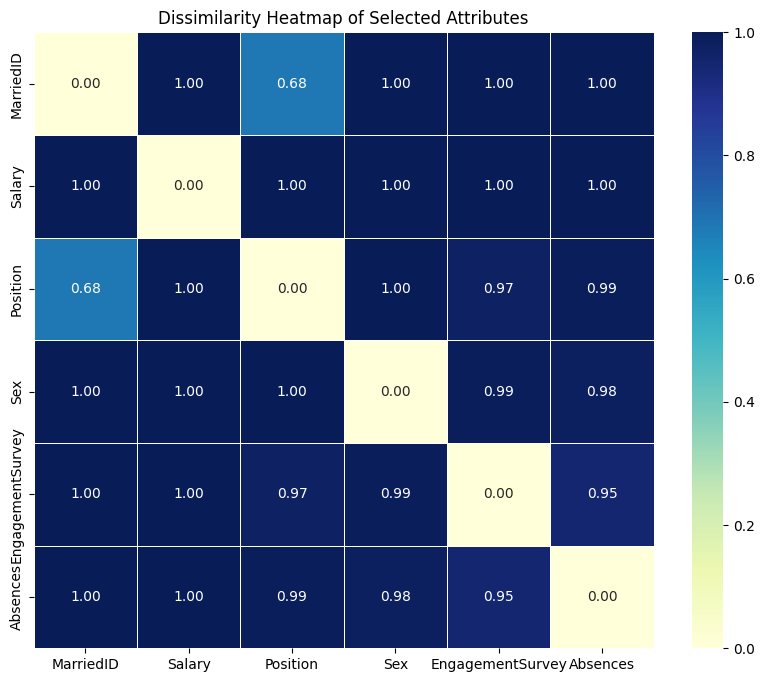

In [15]:
# Calculate dissimilarity matrix
dissimilarity_matrix = pdist(selected_data.T, metric='jaccard')  # You can choose a different metric based on your data

# Convert the dissimilarity matrix to a squareform
dissimilarity_square = squareform(dissimilarity_matrix)

# Create a DataFrame for the dissimilarity values
dissimilarity_df = pd.DataFrame(dissimilarity_square, columns=selected_columns, index=selected_columns)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dissimilarity_df, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Dissimilarity Heatmap of Selected Attributes")
plt.show()

## Conclusion

The dataset shows differences in marital status, gender, salary, absences, and engagement scores, using the Jaccard coefficient for selected attributes in the dataset. The resulting heatmap visually represents the dissimilarity values, offering insights into the distinctiveness among the chosen attributes.